In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
df_segmentation=pd.read_csv("E:/HD/BA/ML/Projects Work/Customer Analytics/segmentation data.csv",index_col='ID')
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


### Heatmap

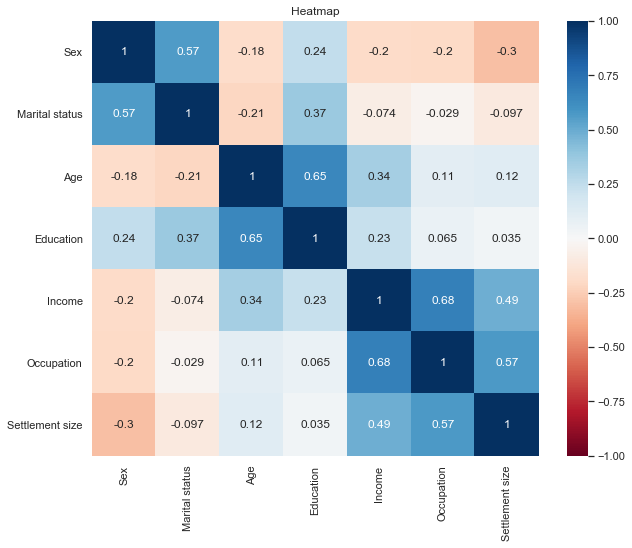

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(df_segmentation.corr(),
            annot=True,
            cmap='RdBu',
            vmin=-1,
            vmax=1)
plt.title("Heatmap")
plt.show()

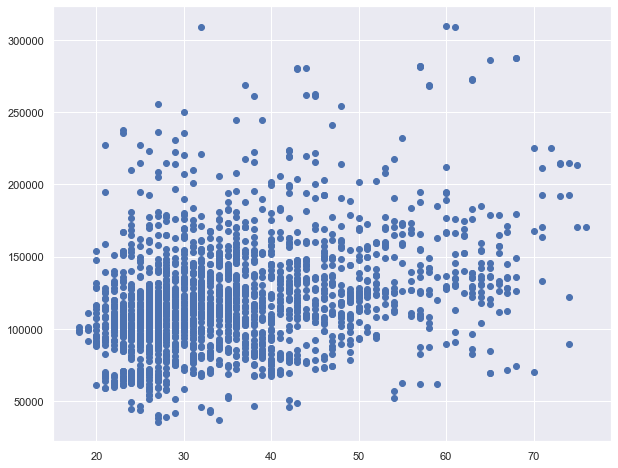

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(df_segmentation['Age'],df_segmentation['Income'])
plt.show()

### Standardization

In [9]:
scaler=StandardScaler()

segmentation_std=scaler.fit_transform(df_segmentation)

### kmeans clustering

In [27]:
from sklearn.cluster import KMeans

sse=[]

for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit(segmentation_std)
  sse.append(km.inertia_)

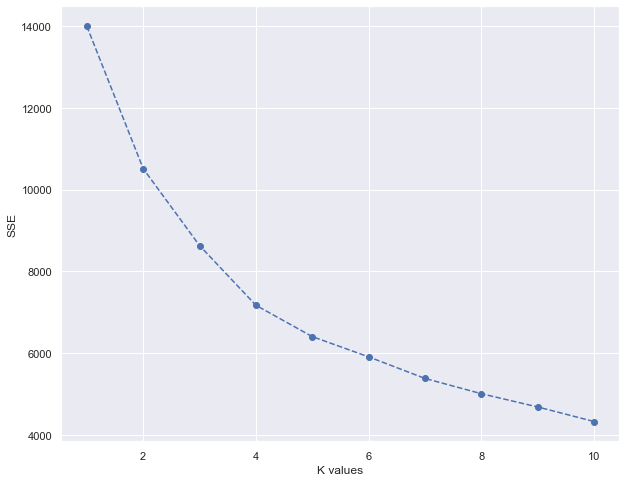

In [28]:
plt.figure(figsize=(10,8))
plt.xlabel("K values")
plt.ylabel("SSE")
plt.plot(range(1,11),sse,marker='o',linestyle="--")
plt.show()

In [12]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.labels_

array([0, 2, 3, ..., 3, 2, 3])

In [14]:
df_seg_kmean=df_segmentation.copy()

In [15]:
df_seg_kmean['Segment']=kmeans.labels_

In [16]:
df_seg_kmean.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,3
100000004,0,0,45,1,171565,1,1,1
100000005,0,0,53,1,149031,1,1,1


In [17]:
df_seg_kmean.groupby('Segment').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290


In [19]:
df_seg_kmean['label']=df_seg_kmean['Segment'].map({0:"well off",
                                                  1:"fewer oppr",
                                                  2:"standard",
                                                  3:"career focused"})
                                                

In [24]:
df_seg_kmean.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,label
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,well off
100000002,1,1,22,1,150773,1,2,2,standard
100000003,0,0,49,1,89210,0,0,3,career focused
100000004,0,0,45,1,171565,1,1,1,fewer oppr
100000005,0,0,53,1,149031,1,1,1,fewer oppr


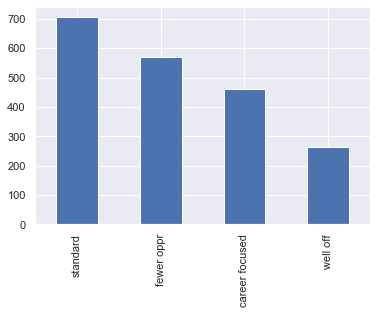

In [23]:
df_seg_kmean['label'].value_counts().plot.bar()

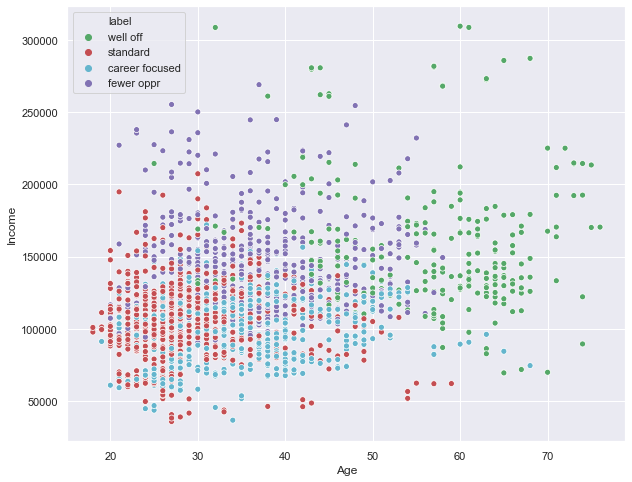

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Age", y="Income",hue="label",data=df_seg_kmean, palette=['g','r','c','m'])
plt.show()

PCA

In [3]:
from sklearn.decomposition import PCA

In [10]:
pca=PCA()

pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

these are the number of components of PCA

first component show 35% variability in data. second component show 26% variability in data and so on

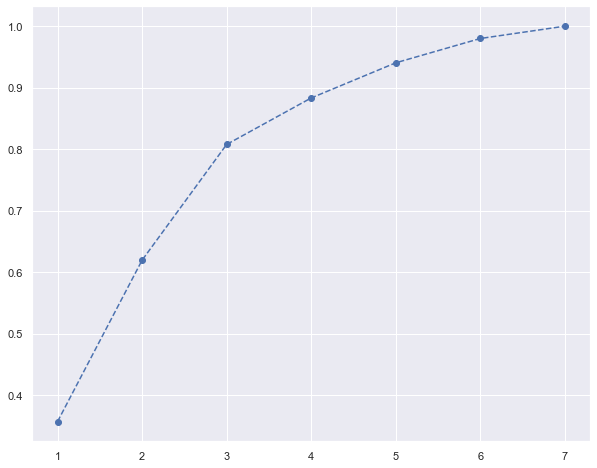

In [14]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle="--")
plt.show()

select the number of component such that atleast 80% variability is preserved

selecting the 3 components

In [15]:
pca=PCA(n_components=3)

pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### PCA Result

In [20]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

its 3x7 matrix. means three components against the original 7 atributes

values shows in actually correlation between component and attibutes

In [22]:
df_pca_comp=pd.DataFrame(pca.components_,
                         columns=df_segmentation.columns.values,
                         index=["comp1","comp2","comp3"])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
comp1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
comp2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
comp3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


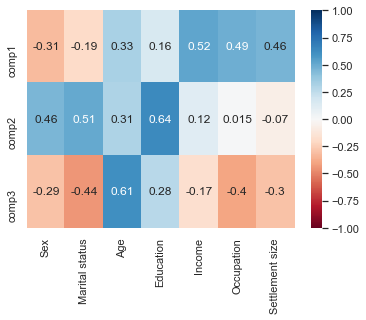

In [23]:
sns.heatmap(df_pca_comp,
            annot=True,
            cmap='RdBu',
            vmin=-1,
            vmax=1)

### Transforming the component into variables

### we have selected three components and assigned to object "pca"


### now we will transform these three component into three variables. currnetly we have 7 variables.

In [24]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [25]:
pca_score=pca.transform(segmentation_std)

so now we have reduced the 7 variables in to 3 variables

## KMeans Clusturing useing the PCA variables

In [29]:
# as pca-score is correlation data, we dont need to standardise it

sse=[]

for i in range(1,11):
  km_pca=KMeans(n_clusters=i)
  km_pca.fit(pca_score)
  sse.append(km_pca.inertia_)

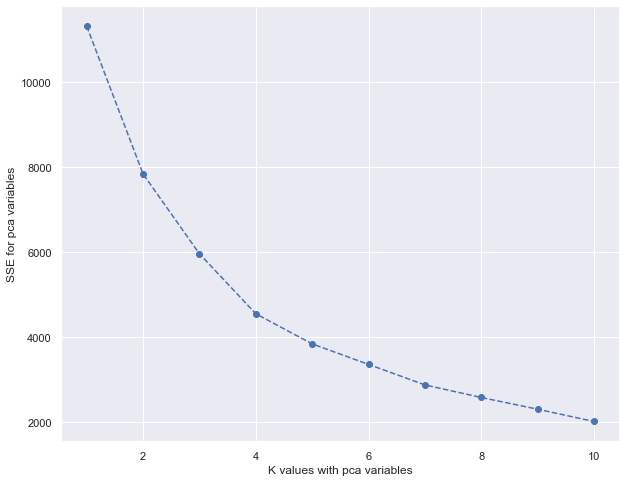

In [30]:
plt.figure(figsize=(10,8))
plt.xlabel("K values with pca variables")
plt.ylabel("SSE for pca variables")
plt.plot(range(1,11),sse,marker='o',linestyle="--")
plt.show()

In [31]:
# selecing 4 number of clusters

kmeans_pca=KMeans(n_clusters=4)
kmeans_pca.fit(pca_score)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

now we will combile original data and pca data for analysis

In [32]:
pca_score

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [35]:
pca_score=pd.DataFrame(pca_score,columns=['Component 1','Component 2','Component 3'])
#pca_score.head()

pca_score["label"]=kmeans_pca.labels_

pca_score.head()

,Component 1,Component 2,Component 3,label
0,2.514746,0.834122,2.174806,2
1,0.344935,0.598146,-2.211603,3
2,-0.651063,-0.680093,2.280419,1
3,1.714316,-0.579927,0.730731,0
4,1.626745,-0.440496,1.244909,0


In [38]:
combined_df=pd.concat([df_segmentation.reset_index(drop=True),pca_score],axis=1)

combined_df

# axis=1 for horizontal concatination

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,label
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,2
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,3
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,0
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,3
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,3


In [39]:
combined_df.groupby('label').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
label,,,,,,,,,,
0,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
1,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
2,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
3,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269


In [40]:
combined_df["label name"]=combined_df["label"].map({0:"standard",
                                                  1:"carrer focused",
                                                  2:"fewer oppurtunites",
                                                  3:"well off"})

combined_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,label,label name
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,2,fewer oppurtunites
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,3,well off
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1,carrer focused
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,0,standard
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,0,standard
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1,carrer focused
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,3,well off
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1,carrer focused
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,3,well off


lets draw scatter plot for component 1 and 2, to see whtether they clustte the data well

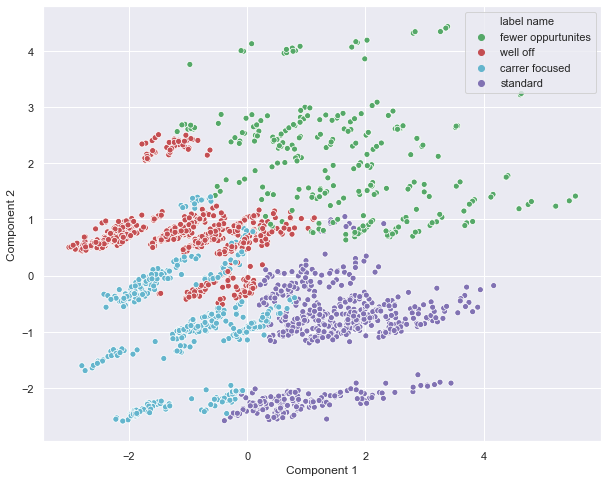

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Component 1", y="Component 2",hue="label name",data=combined_df, palette=['g','r','c','m'])
plt.show()

Scatter plot done before doing the PCA , clusters with overlapping, we were not able to distinguash them
but here with PCA, we are able to distinguaish the four clusters

## Importing Data

In [42]:
import pickle

In [44]:
pickle.dump(scaler,open("scaler.pickle",'wb'))

In [45]:
pickle.dump(pca,open("pca.pickle",'wb'))

In [46]:
pickle.dump(kmeans_pca,open("kmeans_pca.pickle",'wb'))